# Algorytm k-means #

Algorytm k-means jest zaimplementowany w module *scipy.cluster.vq* ([*vq: vector quantization*](https://docs.scipy.org/doc/scipy/reference/cluster.vq.html)). Mamy tam funkcję:

*kmeans(obs, k_or_guess, iter=20, thresh=1e-05)*

optymalizującą położenia centroidów, oraz pomocniczą funkcję *vq*, przypisującą poszczególne obserwacje do skupisk reprezentowanych przez centroidy.

Przed puszczeniem algorytmu k-means na danych dobrze jest przeskalować każdą z cech w macierzy wejściowej, tak aby miała jednostkową wariancję. Można to zrobić za pomoca funkcji *whiten*.

###Przykładowy kod.###
Kod ten pokazuje jak:

*   wygenerować symulowane dane,
*   przeskalować je, tak aby miały jednostkową wariancję w każdej z cech,
*   podzielić je na dwa skupiska,
*   zilustrować wynik.

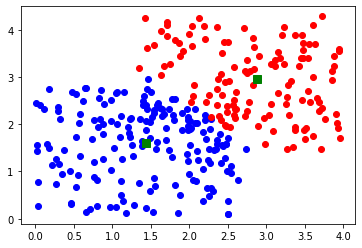

In [0]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq,whiten
 
# generujemy dane: 
# - 150 dwuwymiarowych punktów z rozkładu jednorodnego ze średnią (1,1)
# - 150 dwuwymiarowych punktów z rozkładu jednorodnego ze średnią  (0.5,0.5)
 
data = vstack((rand(150,2) + array([.5,.5]),rand(150,2)))
data =  whiten(data)
# policz K-Means dla  K = 2 (2 skupiska)
centroids,_ = kmeans(data,2)
# przypisz wektory wejściowe do skupisk
idx,_ = vq(data,centroids)
 
# narysuj wyniki
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'or')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

#Segmentacja obrazu algorytmem k-means#

W tym ćwiczeniu zapoznamy się z zastosowaniem algorytmu analizy skupień do segmetacji obrazu. Segmentacja tegotypu może stanowic etap wstępnego przetwarzania na potrzeby np. detekcji obiektów lub klasyfikacji. W zadaniu tym zapoznamy sie także z metodą dobierania atumatycznie ilości skupisk.


Obrazek na którym będziemy pracować znajduje się pod [tym](https://brain.fuw.edu.pl/edu/images/b/b8/Skan.png) adresem, proszę go zapisać w bieżącym katalogu, podłączyć dysk Google'a, zimportować i obejrzeć:

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
folder = '/content/drive/My Drive/Colab Notebooks/' # podaj lokalizację obrazu

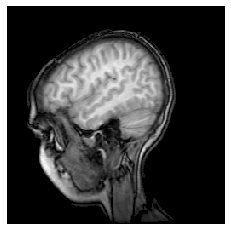

In [0]:
from pylab import plot,show,figure,imshow,cm, imread, axis
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.vq import kmeans,vq
 
image = imread(folder + 'Skan.png')
# Oryginalny obrazek miał przestrzeń barwną RGB.
# Spłaszczamy przestrzeń barwną obrazka
image = image.mean(axis=2)
#oglądamy obrazek
imshow(image, cmap=cm.gray)
axis('off')
show()

Teraz zamieniamy rysunek (dwuwymiarowa tablica 256x256) na wektor (o długości 256*256):

In [0]:
data = image[:]
data.shape = 256*256,1

Teraz będziemy próbować podzielić ten wektor na skupiska (w liczbie od 2 do 9). Dla każdej konkretnej liczby skupisk obliczamy dwie wielkości:

$J_{intra} (K)$ - to jest miara odległości wewwnątrz centrów: równanie na $J$ znajduje się [tutaj](https://brain.fuw.edu.pl/edu/index.php/Uczenie_maszynowe_i_sztuczne_sieci_neuronowe/Wyk%C5%82ad_10#Algorytm_k-.C5.9Brednich:).

$J_{inter} (K) = min_{j<i} \sqrt{(\mu_i - \mu_j)^T (\mu_i - \mu_j)} $ - to najmniejsza odległość między centrami.

In [0]:
import math  
K_max = 9
J_inter = np.ones(K_max)*1e16
J_intra = np.zeros(K_max)
centroids =[]
for K in range(2,K_max):
    trial =0
    while (len(centroids)<K) & (trial<20):
        centroids, J_intra[K] = kmeans(data,K)
        trial+=1
    print('K: ', K, len(centroids))
    for ki in range(len(centroids)):
        for kj in range(ki):
            print(ki, kj)
            print(centroids[ki])
            print(centroids[kj])
            ################
            ## dopisz kod obliczający odległość między centrami i oznacz ją d
            diff=centroids[ki]-centroids[kj]
            d=math.sqrt(np.dot(diff.T, diff))
            ################
            # jeśli uzyskana odległość jest mniejsza niż dotychczas zapamiętana to ją zapamiętujemy:
            if J_inter[K] > d:
              J_inter[K] = d
    print(K, J_intra[K],J_inter[K])

K:  2 2
1 0
[0.27430993]
[0.66312397]
2 0.05665720999240875 0.38881402794728276
K:  3 3
1 0
[0.74030113]
[0.25592014]
2 0
[0.45756742]
[0.25592014]
2 1
[0.45756742]
[0.74030113]
3 0.030115125700831413 0.20164728008108207
K:  4 4
1 0
[0.25168326]
[0.5419282]
2 0
[0.7629846]
[0.5419282]
2 1
[0.7629846]
[0.25168326]
3 0
[0.38582045]
[0.5419282]
3 1
[0.38582045]
[0.25168326]
3 2
[0.38582045]
[0.7629846]
4 0.02183370664715767 0.13413718104176595
K:  5 5
1 0
[0.67973655]
[0.5053329]
2 0
[0.25146285]
[0.5053329]
2 1
[0.25146285]
[0.67973655]
3 0
[0.37533936]
[0.5053329]
3 1
[0.37533936]
[0.67973655]
3 2
[0.37533936]
[0.25146285]
4 0
[0.8275601]
[0.5053329]
4 1
[0.8275601]
[0.67973655]
4 2
[0.8275601]
[0.25146285]
4 3
[0.8275601]
[0.37533936]
5 0.016428597271442413 0.12387651090802392
K:  6 6
1 0
[0.2507667]
[0.8466902]
2 0
[0.44570774]
[0.8466902]
2 1
[0.44570774]
[0.2507667]
3 0
[0.3496831]
[0.8466902]
3 1
[0.3496831]
[0.2507667]
3 2
[0.3496831]
[0.44570774]
4 0
[0.56340796]
[0.8466902]
4 1


Wykreślamy stosunek $J_{intra}/J_{inter}$ i znajdujemy $K$, dla którego jest najmniejszy:

5


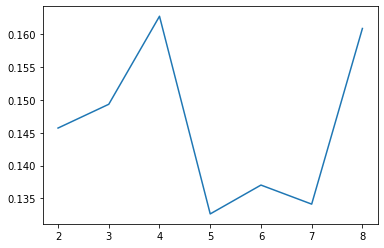

In [0]:
figure(1)
plot(range(2,K_max),J_intra[2:]/J_inter[2:])
K_opt = np.argmin(J_intra[2:]/J_inter[2:])+2
 
print(K_opt)

Dla tej optymalnej ilości skupisk znajdujemy położenia centrów i przypisujemy klasę dla każdego punktu danych:

In [0]:
centroids,J_intra[K] = kmeans(data, K_opt)
 
# przypisujemy klasę
idx,_ = vq(data,centroids)

Formatujemy wektor w obrazek i podziwiamy efekt:

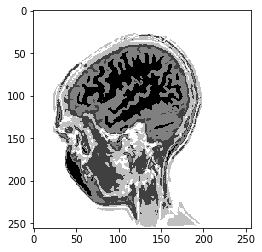

In [0]:
idx.shape = 256,256

plt.figure(2)
plt.imshow(idx, cmap=cm.gray)
plt.show()

Dla porównania proszę wykreślić histogram odcieni szarości dla wektora *data* i wektora *idx*.

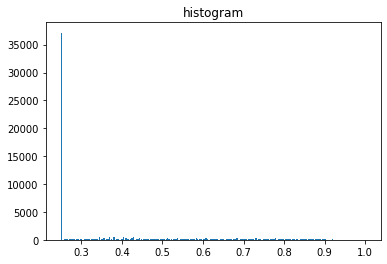

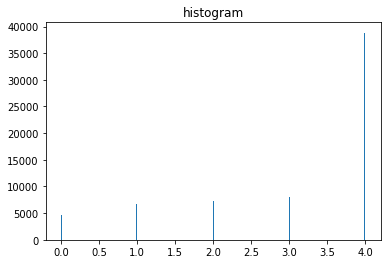

In [0]:
plt.hist(data, bins = 255)
plt.title("histogram") 
plt.show()

idx.shape=256*256,1
plt.hist(idx, bins = 255)
plt.title("histogram") 
plt.show()

# Algorytm EM (Expectation Maximization)#

Program, który powstanie po uzupełnieniu kodu powinien ilustrować dopasowywanie modelu EM do danych będzących sumą dwóch rozkładów gaussowskich.

Najpierw standardowe importy i kilka funkcji pomocniczych:

In [0]:
import matplotlib
import pylab as py
import random, copy
import numpy as np
import sys
 
 
def pnorm(x, m, s):
    """
    Oblicza gęstość wielowymiarowego rozkładu normalnego dla punktów
    w wektorze x
    Parametry rozkładu:
    m - średnia
    s- macierz kowariancji
    dla zwiększenia czytelności kodu stosujemy typ matrix
    """
    xm = np.matrix(x-m)
    xmt = np.matrix(x-m).transpose()
    for i in range(len(s)):
        if s[i,i] <= sys.float_info[3]: # min float
            s[i,i] = sys.float_info[3]
    sinv = np.linalg.inv(s)
 
    return (2.0*np.pi)**(-len(x)/2.0)*(1.0/np.sqrt(np.linalg.det(s)))\
            *np.exp(-0.5*(xm*sinv*xmt))
 
def draw_params(t,nbclusters):
        '''funkcja do losowania parametrów początkowych
        t - zbiór treningowy
        '''
        nbobs,nbfeatures = t.shape
        # inicjuje średnie przez losowanie punktu ze zbioru danych
        tmpmu = np.array([t[random.randint(0,nbobs),:]],np.float64)
        # kowariancje inicjowane są jako macierze diagonalne , wariancja dla każdej cechy inicjowana jest jako wariancja tej cechy dla całego zbioru 
        sigma = np.zeros((nbfeatures,nbfeatures))
        for f in range(nbfeatures):
            sigma[f,f] = np.var(t[:,f])
        #phi inicjujemy tak, że każda składowa mieszanki ma takie samee prawdopodobieństwo
        phi = 1.0/nbclusters
        print ('INIT:', tmpmu, sigma, phi)
        return {'mu': tmpmu,\
                'sigma': sigma,\
                'phi': phi}
 
def plot_gauss(mu,sigma):
    ''' Funkcja rysująca kontury funkcji gęstości prawdopodobieństwa 
       dwuwymiarowego rozkładu Gaussa'''
 
    x = np.arange(-6.0, 6.0001, 0.1)
    y = np.arange(-6.0, 6.0001, 0.1)
    X,Y = np.meshgrid(x, y)
    X.shape = 1,len(x)*len(y)
    Y.shape = 1,len(x)*len(y)
    P = np.vstack((X,Y))
    invS = np.linalg.inv(sigma)
    R = P.T-mu
    z = np.zeros(len(R))
    for i in range(len(R)):
        z[i] = np.exp(-0.5*np.dot( R[i,:].T,np.dot(invS,R[i,:])))
 
    z.shape = len(x),len(y)
    py.contourf(x,y,z,alpha = 0.5)
    py.plot(mu[0],mu[1],'o')

## Szkielet algorytmu ##
Poniższy kod to szkielet właściwej funkcji wykonującej optymalizację. Trzeba go uzupełnić implementując równania z wykładu. Proszę uważnie czytać komentarze.

In [0]:
def expectation_maximization(t, nbclusters=2, nbiter=3, normalize=False,\
        epsilon=0.001, monotony=False, datasetinit=True):
    """
    t - zbiór treningowy, 
    Każdy wiersz t jest przykładem (obserwacją), każda kolumna to cecha 
    'nbclusters' ilość klastrów, z których budujemy model mieszany
    'nbiter' ilość iteracji
    'epsilon' kryterium zbieżności
 
     Powtórz kroki E i M aż do spełnienia warunku |E_t - E_{t-1}| < ε
 
    Funkcja zwraca parametry modelu (centra i macerze kowariancji Gaussów i ich wagi \phi) oraz 
    etykiety punktów zbioru treningowego oznaczające do którego z Gaussów w modelowanej mieszance należą.
    """
 
    nbobs,nbfeatures = t.shape
 
    ### Opcjonalna normalizacja
    if normalize:
        for f in range(nbfeatures):
            t[:,f] /= np.std(t[:,f])
 
 
    result = {}
    random.seed()
 
    # szykujemy tablice na prawdopodobieństwa warunkowe
    Pz = np.zeros((nbobs,nbclusters)) # P(z|x): opisywane równaniami (2) i (3) z wykładu 
    Px = np.zeros((nbobs,nbclusters)) # P(x|z): opisywane równaniem (4)  
 
    # inicjujemy parametry dla każdego składnika mieszanki
    # params będzie listą taką, że params[i] to słownik
    # zawierający parametry i-tego składnika mieszanki
    params = []
    for i in range(nbclusters):
        params.append( draw_params(t,nbclusters) )
 
    old_log_estimate = sys.maxsize                 # init
    log_estimate = sys.maxsize/2 + epsilon      # init
    estimation_round = 0    
 
    # powtarzaj aż zbiegniesz 
    while (abs(log_estimate - old_log_estimate) > epsilon\
                and (not monotony or log_estimate < old_log_estimate)):
        restart = False
        old_log_estimate = log_estimate   
        ########################################################
        # krok E: oblicz Pz dla każdego przykładu (czyli w oznaczeniach z wykładu w_i^j)
        ########################################################
        # obliczamy prawdopodobieństwa  Px[j,i] = P(x_j|z_j=i)  
        for j in range(nbobs): # iterujemy po przykładach
            for i in range(nbclusters): # iterujemy po składnikach
                Px[j,i] = pnorm(t[j,:], params[i]['mu'], params[i]['sigma']) #  (równanie 4)
 
        #  obliczamy prawdopodobieństwa Pz[j,i] = P(z_j=i|x_j)   
        #  najpierw licznik równania (3)   
        for j in range(nbobs): 
            for i in range(nbclusters):
                Pz[j,i] = Px[j,i]*params[i]['phi']
        #  mianownik równania (3)
        for j in range(nbobs): 
            tmpSum = 0.0
            for i in range(nbclusters):
                tmpSum += Px[j,i]
        # składamy w całość Pz[j,i] = P(z_j=i|x_j)
            Pz[j,:] /= tmpSum
 
        ###########################################################
        # krok M: uaktualnij paramertry (sets {mu, sigma, phi}) #
        ###########################################################
        #print "iter:", iteration, " estimation#:", estimation_round,\
        #            " params:", params
        for i in range(nbclusters):
            print("------------------")
            # parametr phi: równanie (6)
            Sum_w = np.sum(Pz[:,i])
            params[i]['phi'] = Sum_w/nbobs
            if params[i]['phi'] <= 1.0/nbobs:           # restartujemy jeśli zanika nam któraś składowa mieszanki
                restart = True                          
                print("Restarting, p:",params[i]['phi'])
                break
            print('i: ',i,' phi: ', params[i]['phi'])
            # średnia: równanie (7)
            m = np.zeros(nbfeatures)
            for j in range(nbobs):
                m += Pz[j,i]*t[j,:]
            params[i]['mu'] = m/Sum_w
            print('i: ',i,' mu: ', params[i]['mu'])
 
            # macierz kowariancji: równanie (8)
            s = np.matrix(np.zeros((nbfeatures,nbfeatures)))
            for j in range(nbobs):
                roznica = np.matrix(t[j,:]-params[i]['mu'])
                s += Pz[j,i]*(roznica.T*roznica)
            params[i]['sigma'] = s/Sum_w
 
            print(params[i]['sigma'])
 
            ### Testujemy czy składniki się nie sklejają i w razie potrzeby restartujemy
            if not restart:
                restart = True
                for i in range(1,nbclusters):
                    if not np.allclose(params[i]['mu'], params[i-1]['mu'])\
                    or not np.allclose(params[i]['sigma'], params[i-1]['sigma']):
                        restart = False
                        break
            if restart:                
                old_log_estimate = sys.maxint                 # init
                log_estimate = sys.maxint/2 + epsilon    # init
                params = [draw_params(t,nbclusters) for i in range(nbclusters)] # losujemy nowe parametry startowe
                print('RESTART')
                continue
 
 
            ####################################
            # liczymy estymatę log wiarygodności: równaie (1)  #
            ####################################
            log_estimate = np.sum([np.log(np.sum(\
                    [Px[j,i]*params[i]['phi'] for i in range(nbclusters)]))\
                    for j in range(nbobs)])
            print("(EM) poprzednia i aktualna estymata log wiarygodności: ",\
                    old_log_estimate, log_estimate)
            estimation_round += 1
        ##########################
        #  rysujemy aktualny stan modelu
        ##########################
        py.ioff()
        py.clf()
        py.ion()
        for i in range(nbclusters):
            plot_gauss(np.array(params[i]['mu']),np.array(params[i]['sigma']))
        py.plot(x[:,0],x[:,1],'g.')
        py.axis('equal')
        py.draw()
 
 
        # Pakujemy wyniki
        result['quality'] = -log_estimate
        result['params'] = copy.deepcopy(params)
        result['clusters'] = [[o for o in range(nbobs)\
                if Px[o,c] == max(Px[o,:])]\
                for c in range(nbclusters)]
    return result

## Finalny program ##
Przykładowy program korzystający z powyższych funkcji:

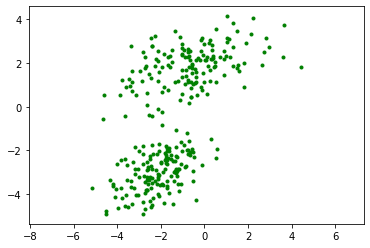

INIT: [[-1.64907814 -2.35013622]] [[2.57655256 0.        ]
 [0.         6.74801982]] 0.5
INIT: [[1.17903893 2.29575063]] [[2.57655256 0.        ]
 [0.         6.74801982]] 0.5
------------------
i:  0  phi:  0.3351948516044562
i:  0  mu:  [-2.11559165 -1.76956975]
[[1.27218227 0.64019   ]
 [0.64019    4.74142904]]
(EM) poprzednia i aktualna estymata log wiarygodności:  4.611686018427388e+18 -1393.279429274129
------------------
i:  1  phi:  0.16480514839554375
i:  1  mu:  [0.06145419 1.90502499]
[[2.0521616  0.60496574]
 [0.60496574 1.77716116]]
(EM) poprzednia i aktualna estymata log wiarygodności:  4.611686018427388e+18 -1498.649612709431
------------------
i:  0  phi:  0.20366016028881528
i:  0  mu:  [-2.16280182 -2.20455769]
[[1.20053643 0.40548836]
 [0.40548836 3.57961469]]
(EM) poprzednia i aktualna estymata log wiarygodności:  -1498.649612709431 -1482.0630385190702
------------------
i:  1  phi:  0.0646716207533423
i:  1  mu:  [-0.21386632  1.99044548]
[[2.39926138 0.51115485]
 

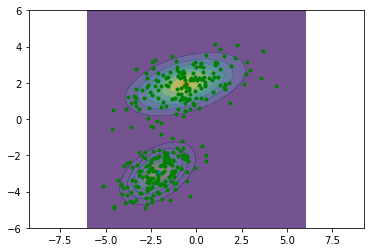

Dopasowany model: 
[{'mu': array([-2.1410403 , -2.99749827]), 'sigma': matrix([[1.15388826, 0.45370526],
        [0.45370526, 0.79129011]]), 'phi': 0.0019607122770145193}, {'mu': array([-0.6106835 ,  1.92764867]), 'sigma': matrix([[2.88377615, 0.65839632],
        [0.65839632, 0.80294763]]), 'phi': 0.0007979715570412575}]


In [0]:
# robimy mieszankę dwóch gaussów:
#parametry rozkładu
# wektor średnich:
mu1 = [-2,-3] 
# macierz kowariancji:
Sigma1 = np.array([[1, 0.5],
                  [0.5, 1]])
# generujemy dane: 
x1 = np.random.multivariate_normal(mu1, Sigma1, 150) #
mu2 = [-0.5,2] 
# macierz kowariancji:
Sigma2 = np.array([[3, 0.5],
                  [0.5, 1]])
# generujemy dane: 
x2 = np.random.multivariate_normal(mu2, Sigma2, 150) #
# łączymy x1 i x2 aby otrzymac jeden zbiór
x = np.vstack((x1,x2))
py.plot(x[:,0],x[:,1],'g.')
py.axis('equal')
py.show()
py.figure()
res = expectation_maximization(x, nbclusters=2, nbiter=3, normalize=False,\
        epsilon=0.001, monotony=False, datasetinit=True)
py.ioff()
py.show()
# wypisz parametry
print('Dopasowany model: ')
print(res['params'])

Aby obliczyć gęstość prawdopodobieństwa rozkładu mieszanego dla pewnego nowego punktu "x" możemy zastosować poniższą funkcję:

In [0]:
def prob_mix(params, x):
    '''params - parametry dopasowanego gaussowskiego modelu mieszanego
    x - punkt wejścowy,
 
    funkcja zwraca gestość prawdopodobieństwa, dla x w rozkładzie mieszanym
    '''
    prob = 0
    for i in range(len(params)):
        prob+= pnorm(x, params[i]['mu'], params[i]['sigma']) * params[i]['phi']
 
 
    return prob
#---------------- przykładowe użycie: ----------------
x=(-1,2)
print('P(x=(',str(x),')):', prob_mix(res['params'], x))

P(x=( (-1, 2) )): [[8.83956232e-05]]
